# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import datasets,linear_model,metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Training Dataset

In [2]:
House = pd.read_csv(r'E:\Projects\archive\kc_house_data.csv')
House

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Description

In [3]:
House.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
House.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
House.shape

(21613, 21)

In [7]:
House.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#check for any Missing Values
House.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
House.isnull().sum()*100/House.shape[0]

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

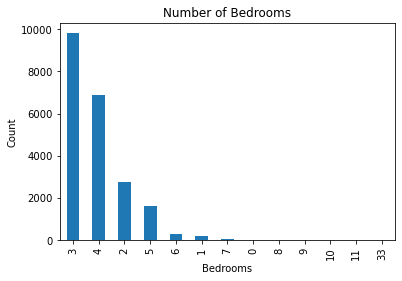

In [10]:
#Finding out which is a common house BedroomWise
House["bedrooms"].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<Figure size 720x720 with 0 Axes>

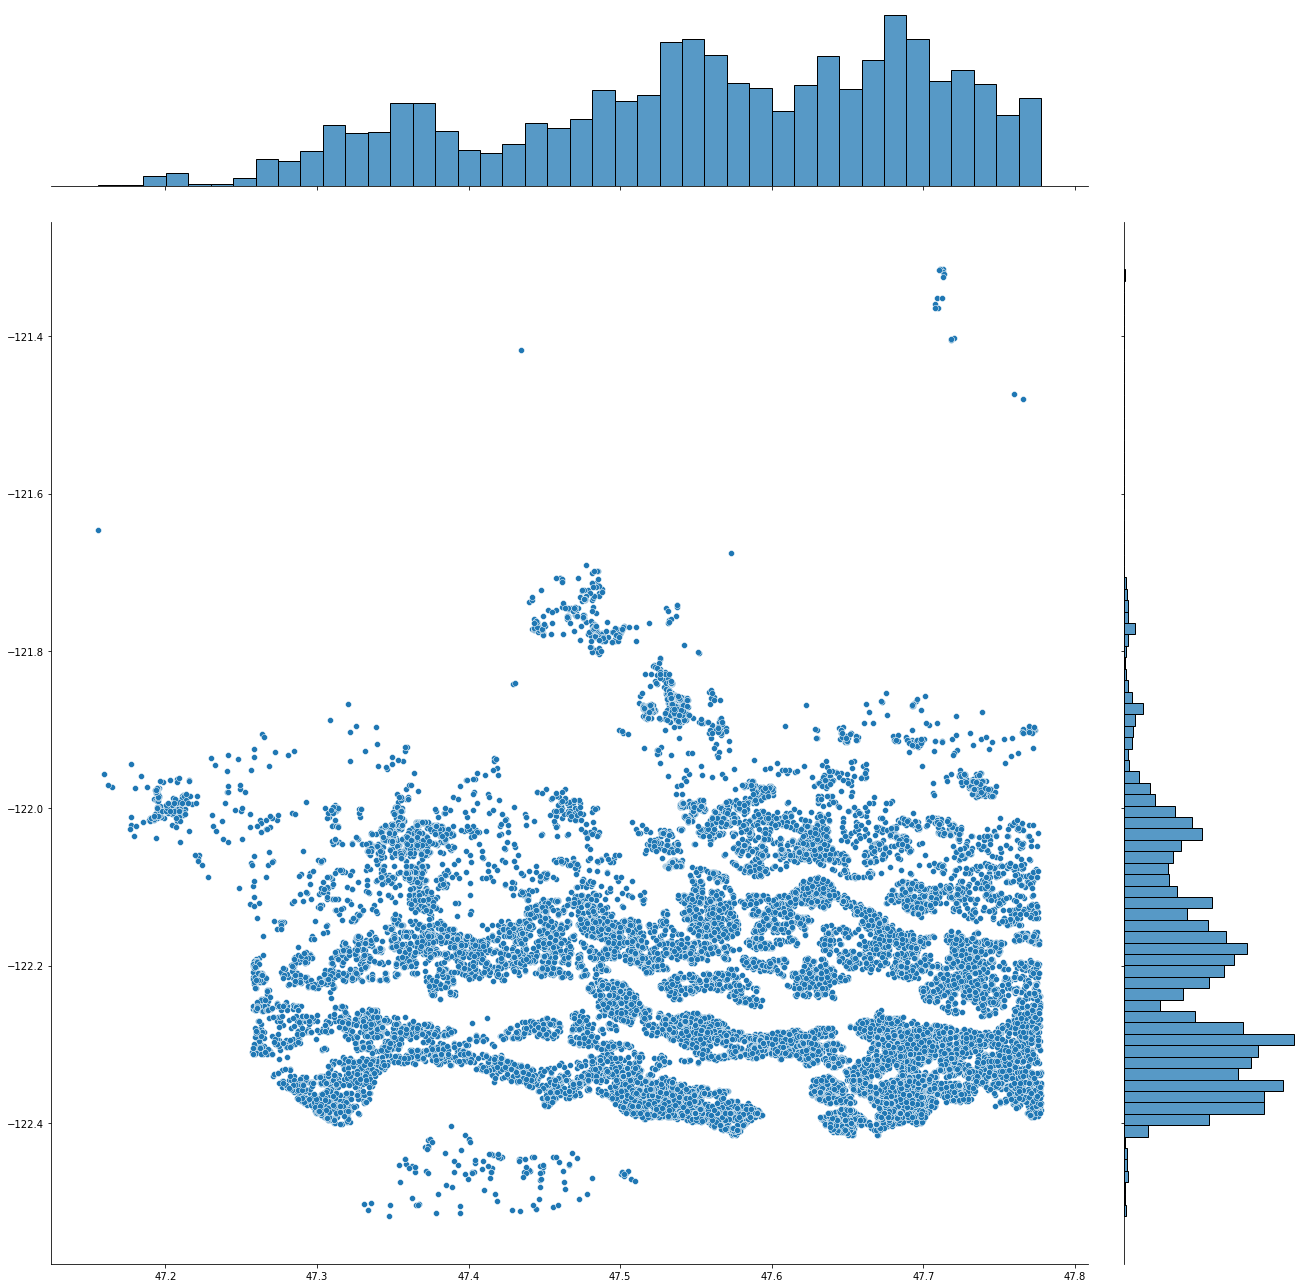

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
#Visualizing the location of the houses based on latitude and longitude
plt.figure(figsize=(10,10))
sns.jointplot(x=House.lat.values, y = House.long.values, size = 18)
plt.xlabel('Latitude',fontsize = 18)
plt.ylabel('Longitude',fontsize = 18)
plt.show()
sns.despine

### looking at common factors which are affecting the price of the houses

# Price vs Square feet 

Text(0.5, 1.0, 'Price x Square Ft.')

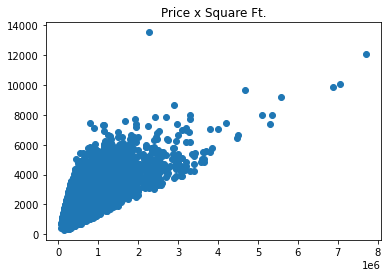

In [12]:
plt.scatter(House.price,House.sqft_living)
plt.title("Price x Square Ft.")

# Price vs Longitude

Text(0.5, 1.0, 'Price x Location of Area')

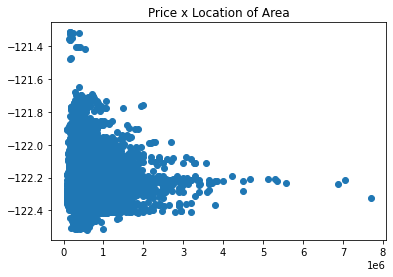

In [13]:
plt.scatter(House.price,House.long)
plt.title("Price x Location of Area")

# Price vs Latitude

Text(0.5, 1.0, 'Price x Location of Area')

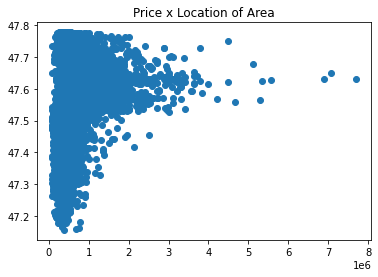

In [14]:
plt.scatter(House.price,House.lat)
plt.title("Price x Location of Area")

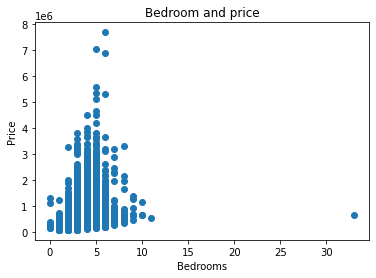

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(House.bedrooms,House.price)
plt.title("Bedroom and price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine()

### Total sqft. including Basement vs Price

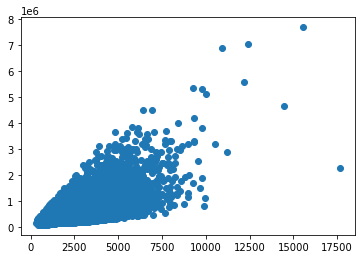

In [16]:
plt.scatter((House['sqft_living']+House['sqft_basement']),House['price'])

### Total sqft. including Waterfront vs Price

Text(0.5, 1.0, 'Waterfront vs Price')

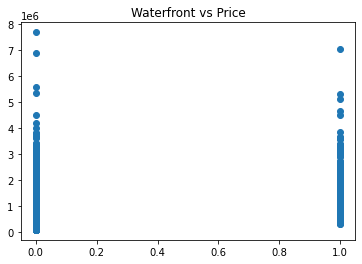

In [17]:
plt.scatter(House.waterfront,House.price)
plt.title("Waterfront vs Price")

### Total sqft. including Floors vs Price

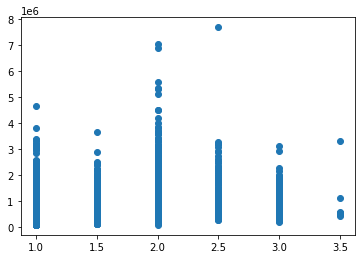

In [18]:
plt.scatter(House.floors,House.price)

### Total sqft. including Condition vs Price

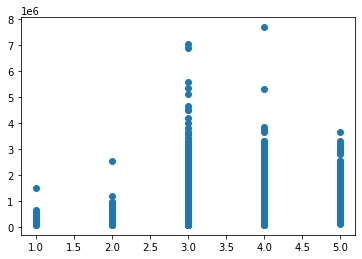

In [19]:
plt.scatter(House.condition,House.price)

In [20]:
X1 = House.drop(['id', 'price'],axis=1)
X1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

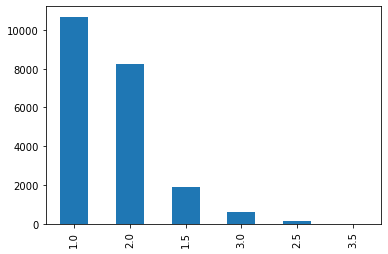

In [21]:
House.floors.value_counts().plot(kind='bar')

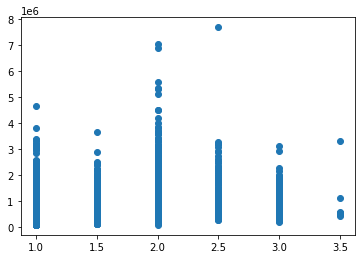

In [22]:
plt.scatter(House.floors,House.price)

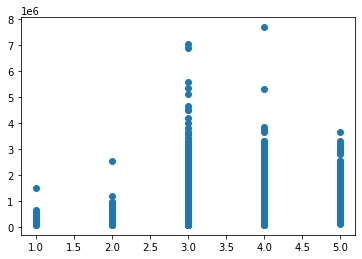

In [23]:
plt.scatter(House.condition,House.price)

Text(0.5, 1.0, 'pricey location by zipcode?')

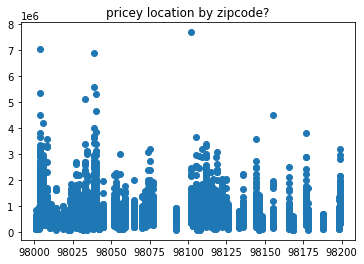

In [24]:
plt.scatter(House.zipcode,House.price)
plt.title("pricey location by zipcode?")

# Model Creation For House Prediction


## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [31]:
labels = House['price']
conv_dates = [1 if values == 2023 else 0 for values in House.date]
House['date']= conv_dates
train1 = House.drop(['id','price'],axis=1)

# Splitting Dataset into Training and Testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(train1,labels , test_size = 0.20, random_state = 30)

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
#Accuracy using Linear Regression
reg.score(x_test,y_test)

0.7182529653977002

# Gradient Boost

In [37]:

from sklearn import ensemble
Gb = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)


In [38]:
Gb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [41]:
y_pred = reg.predict(x_test)

# Prediction of House Price

In [42]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scale(train1))

array([[-2.64785461e+00, -4.54699955e-02, -3.16665762e-01, ...,
        -7.94687728e-02, -2.95749686e-17,  0.00000000e+00],
       [-2.34485164e-01,  1.68297114e+00, -7.61521725e-01, ...,
         9.81487761e-01,  1.40835515e-14,  0.00000000e+00],
       [-2.57007792e+00, -6.14344122e-01,  3.49292423e-01, ...,
        -1.38570764e-01,  1.97566608e-14,  0.00000000e+00],
       ...,
       [-2.41985641e+00, -1.10027662e+00, -1.46293798e+00, ...,
         9.66785881e-01,  6.80673453e-17, -0.00000000e+00],
       [ 3.32183025e-01, -1.88043103e+00, -1.04412760e+00, ...,
        -3.97449542e-01, -3.12959162e-17,  0.00000000e+00],
       [-2.43180432e+00, -1.08505981e+00, -1.47248379e+00, ...,
         9.53674385e-01, -1.94097585e-17, -0.00000000e+00]])

In [43]:
x=Gb.predict([x_test.iloc[-10]])
x

array([261886.48306296])

In [45]:
y_test.iloc[-10]


280000.0

# House Prediction Success

# Thank You